In [0]:
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from google.colab import files

In [0]:
!pip install -q kaggle

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kshitijalwadhi","key":"867eb86b7df9e0190a9623065cdde2a8"}'}

In [0]:
!mkdir ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d nih-chest-xrays/sample

100% 4.20G/4.20G [01:22<00:00, 20.6MB/s]
100% 4.20G/4.20G [01:22<00:00, 54.6MB/s]


In [0]:
mkdir data

In [10]:
!unzip sample.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/sample/sample/images/00003129_000.png  
  inflating: /content/data/sample/sample/images/00003129_001.png  
  inflating: /content/data/sample/sample/images/00003129_004.png  
  inflating: /content/data/sample/sample/images/00003129_009.png  
  inflating: /content/data/sample/sample/images/00003129_011.png  
  inflating: /content/data/sample/sample/images/00003135_000.png  
  inflating: /content/data/sample/sample/images/00003140_007.png  
  inflating: /content/data/sample/sample/images/00003159_001.png  
  inflating: /content/data/sample/sample/images/00003169_001.png  
  inflating: /content/data/sample/sample/images/00003177_002.png  
  inflating: /content/data/sample/sample/images/00003186_004.png  
  inflating: /content/data/sample/sample/images/00003186_005.png  
  inflating: /content/data/sample/sample/images/00003190_018.png  
  inflating: /content/data/sample/sample/images/00003191_001.png  
  inflating

In [0]:
path = '/content/data/sample/'

In [13]:
df = pd.read_csv('/content/data/sample_labels.csv')
df.head()

Image Index  ... OriginalImagePixelSpacing_y
0  00000013_005.png  ...                       0.139
1  00000013_026.png  ...                       0.168
2  00000017_001.png  ...                       0.168
3  00000030_001.png  ...                       0.143
4  00000032_001.png  ...                       0.168

[5 rows x 11 columns]

In [15]:
df['Finding Labels']

0       Emphysema|Infiltration|Pleural_Thickening|Pneu...
1                                  Cardiomegaly|Emphysema
2                                              No Finding
3                                             Atelectasis
4                             Cardiomegaly|Edema|Effusion
                              ...                        
5601                                           No Finding
5602                      Cardiomegaly|Effusion|Emphysema
5603                                         Infiltration
5604                                           No Finding
5605                                           No Finding
Name: Finding Labels, Length: 5606, dtype: object

In [16]:
ans =0
for row in df['Finding Labels']:
  if row =='No Finding':
    ans+=1
print(ans)

3044


In [0]:
s = pd.DataFrame(df['Image Index'])

In [20]:
s

Image Index
0     00000013_005.png
1     00000013_026.png
2     00000017_001.png
3     00000030_001.png
4     00000032_001.png
...                ...
5601  00030712_000.png
5602  00030786_005.png
5603  00030789_000.png
5604  00030792_000.png
5605  00030797_000.png

[5606 rows x 1 columns]

In [21]:
lis=[]
for row in df['Finding Labels']:
  if row =='No Finding':
    lis.append(0)
  else:
    lis.append(1)
print(lis) 

[1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 

In [22]:
s['flag'] = lis
s

Image Index  flag
0     00000013_005.png     1
1     00000013_026.png     1
2     00000017_001.png     0
3     00000030_001.png     1
4     00000032_001.png     1
...                ...   ...
5601  00030712_000.png     0
5602  00030786_005.png     1
5603  00030789_000.png     1
5604  00030792_000.png     0
5605  00030797_000.png     0

[5606 rows x 2 columns]

In [0]:
s.to_csv('flags.csv', index=False)

In [24]:
pwd

'/content'

In [25]:
ls

data/  flags.csv  kaggle.json  sample_data/  sample.zip


In [0]:
cp /content/flags.csv /content/data/sample/

In [0]:
mv flags.csv labels.csv

In [0]:
data = ImageDataBunch.from_csv('/content/', folder='data/sample/images/', ds_tfms=get_transforms(), valid_pct=0.2,size=224, bs=4)

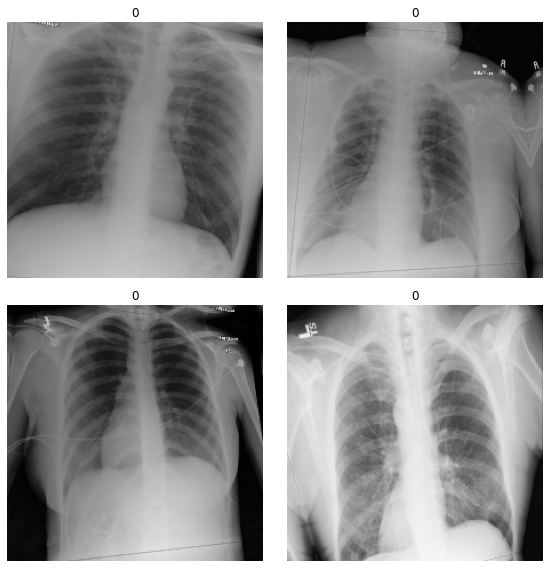

In [32]:
data.show_batch(rows=5)

In [38]:
len(data.train_ds)

4485

In [39]:
len(data.valid_ds)

1121

In [40]:
data.classes

[0, 1]

In [41]:
learn = cnn_learner(data, models.resnet34,metrics=error_rate,model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


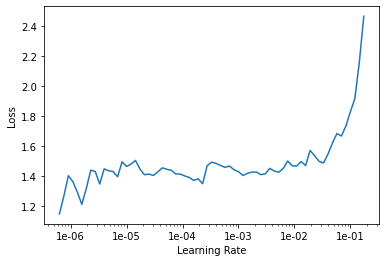

In [47]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


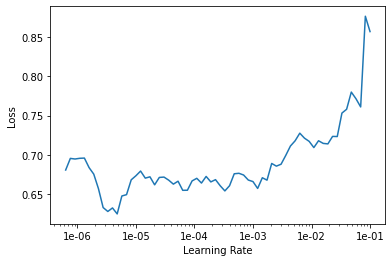

In [53]:
learn.lr_find()
learn.recorder.plot()

In [54]:
learn.fit_one_cycle(4,slice(1e-5,5e-3))

In [0]:
learn.save('stage-2')

In [0]:
learn.export()

In [0]:
mkdir covid_data

In [58]:
!kaggle datasets download -d luisblanche/covidct

 91% 78.0M/85.8M [00:01<00:00, 46.7MB/s]
100% 85.8M/85.8M [00:01<00:00, 47.7MB/s]


In [59]:
!unzip covidct.zip -d /content/covid_data

Archive:  covidct.zip
  inflating: /content/covid_data/COVID-CT-MetaInfo.xlsx  
  inflating: /content/covid_data/CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png  
  inflating: /content/covid_data/CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%1.png  
  inflating: /content/covid_data/CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-91.png  
  inflating: /content/covid_data/CT_COVID/2020.01.24.919183-p27-132.png  
  inflating: /content/covid_data/CT_COVID/2020.01.24.919183-p27-133.png  
  inflating: /content/covid_data/CT_COVID/2020.01.24.919183-p27-134.png  
  inflating: /content/covid_data/CT_COVID/2020.01.24.919183-p27-135.png  
  inflating: /content/covid_data/CT_COVID/2020.02.10.20021584-p6-52%0.png  
  inflating: /content/covid_data/CT_COVID/2020.02.10.20021584-p6-52%1.png  
  inflating: /content/covid_data/CT_COVID/2020.02.10.20021584-p6-52%10.png 

In [0]:
path = '/content/covid_data/'

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train =".", valid_pct=0.2, ds_tfms=get_transforms(),size=224)

In [62]:
data.classes

['CT_COVID', 'CT_NonCOVID']

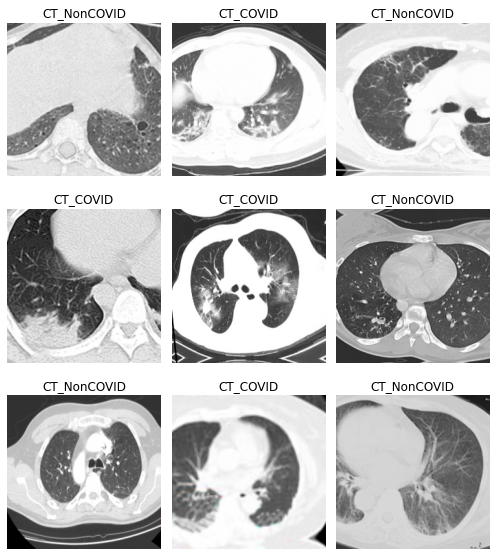

In [63]:
data.show_batch(rows=3, figsize = (7,8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.load('/tmp/model/stage-2');

In [69]:
learn.fit_one_cycle(4)

In [0]:
learn.save('covid-stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


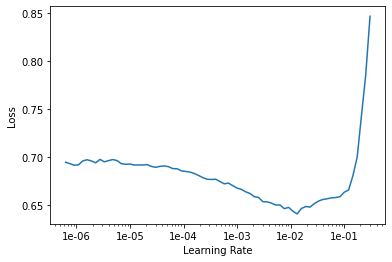

In [72]:
learn.lr_find()
learn.recorder.plot()

In [73]:
learn.fit_one_cycle(5, slice(1e-5,3e-2))

In [0]:
learn.save('covid-stage-2')

In [76]:
interp = ClassificationInterpretation.from_learner(learn)

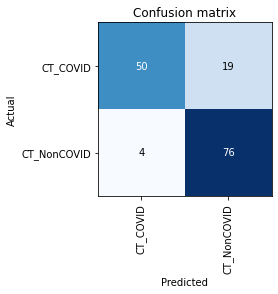

In [77]:
interp.plot_confusion_matrix()

In [0]:
mkdir /content/testing/

In [79]:
cd /content/testing/

/content/testing


In [80]:
files.upload()

Saving 1-mild.jpg to 1-mild.jpg
Saving 2-severe.jpeg to 2-severe.jpeg
Saving 3-severe.jpg to 3-severe.jpg
Saving 4-normal.jpg to 4-normal.jpg
Saving 5-normal.jpg to 5-normal.jpg


{'1-mild.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xfe\x00.Handmade Software, Inc. Image Alchemy v1.14\n\xff\xed!\xeaPhotoshop 3.0\x008BIM\x04%\x00\x00\x00\x00\x00\x10\x8d\xe3z\x94l\x14\xae\x9a\xe1b/\xb1`FI\\8BIM\x04:\x00\x00\x00\x00\x00\xe5\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x00\x00\x00\x0bprintOutput\x00\x00\x00\x05\x00\x00\x00\x00PstSbool\x01\x00\x00\x00\x00Inteenum\x00\x00\x00\x00Inte\x00\x00\x00\x00Clrm\x00\x00\x00\x0fprintSixteenBitbool\x00\x00\x00\x00\x0bprinterNameTEXT\x00\x00\x00\x01\x00\x00\x00\x00\x00\x0fprintProofSetupObjc\x00\x00\x00\x0c\x00P\x00r\x00o\x00o\x00f\x00 \x00S\x00e\x00t\x00u\x00p\x00\x00\x00\x00\x00\nproofSetup\x00\x00\x00\x01\x00\x00\x00\x00Bltnenum\x00\x00\x00\x0cbuiltinProof\x00\x00\x00\tproofCMYK\x008BIM\x04;\x00\x00\x00\x00\x02-\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x00\x00\x00\x12printOutputOptions\x00\x00\x00\x17\x00\x00\x00\x00Cptnbool\x00\x00\x00\x00\x00Clbrbool\x00\x00\x00\x00\x00RgsMbool\x00\x00\x00\x00\x00CrnC

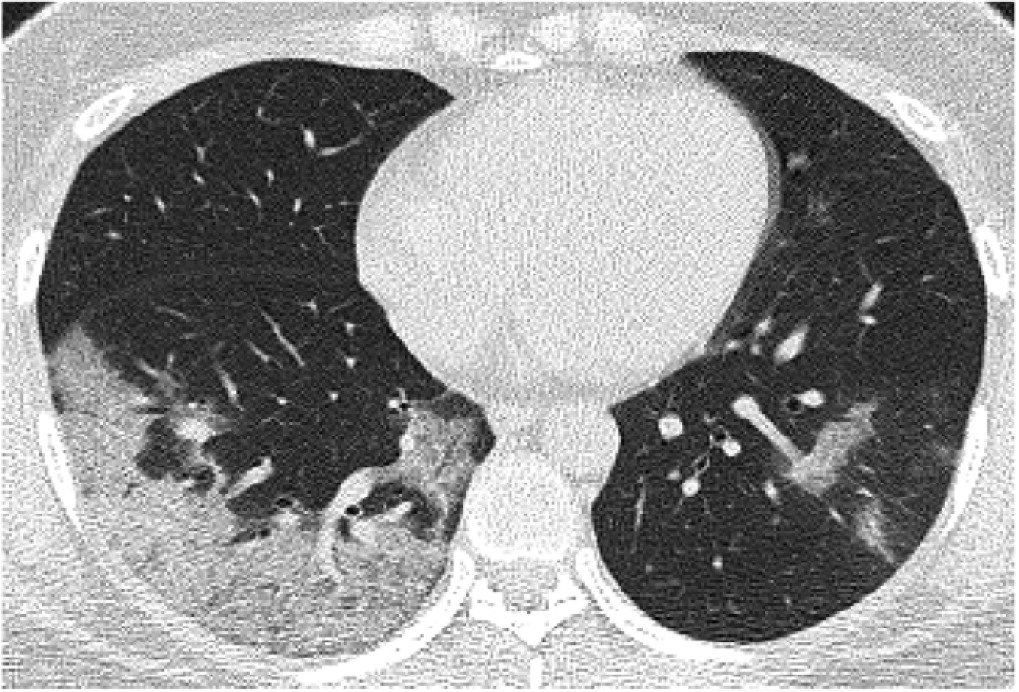

In [81]:
img1 = open_image('/content/testing/1-mild.jpg')
img1

In [0]:
learn.export()

In [0]:
learn= load_learner(path)

In [85]:
pred_class,pred_idx,outputs = learn.predict(img1)
pred_class, outputs

(Category CT_COVID, tensor([0.7629, 0.2371]))

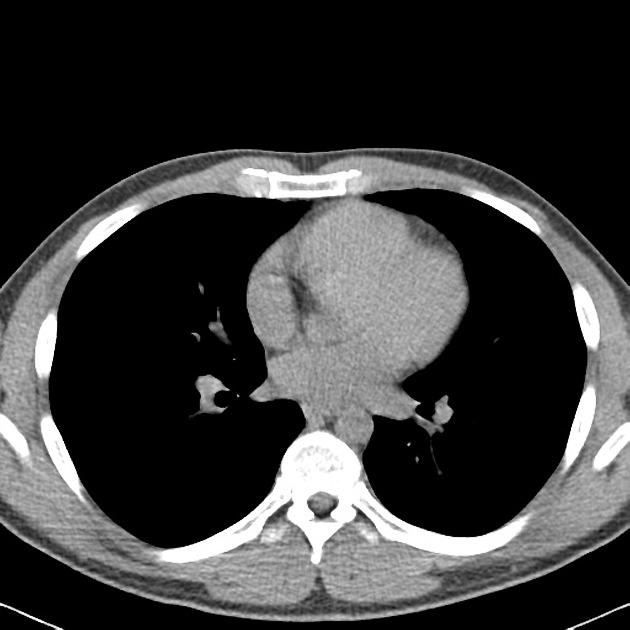

In [89]:
img5 = open_image('/content/testing/5-normal.jpg')
img5

In [90]:
pred_class,pred_idx,outputs = learn.predict(img5)
pred_class, outputs

(Category CT_NonCOVID, tensor([0.1728, 0.8272]))

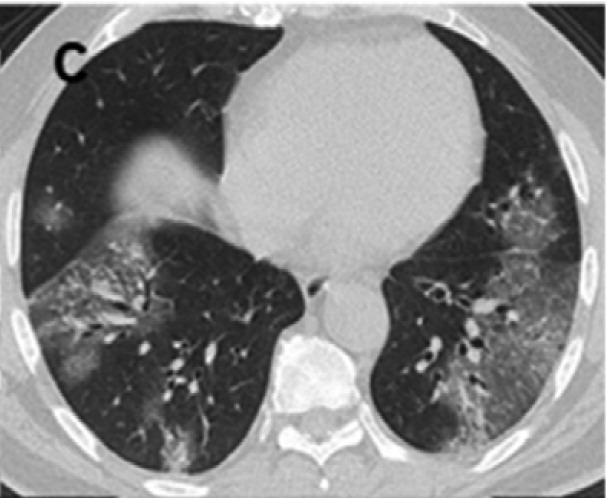

In [92]:
img2 = open_image('/content/testing/2-severe.jpeg')
img2

In [93]:
pred_class,pred_idx,outputs = learn.predict(img2)
pred_class, outputs

(Category CT_NonCOVID, tensor([0.2376, 0.7624]))

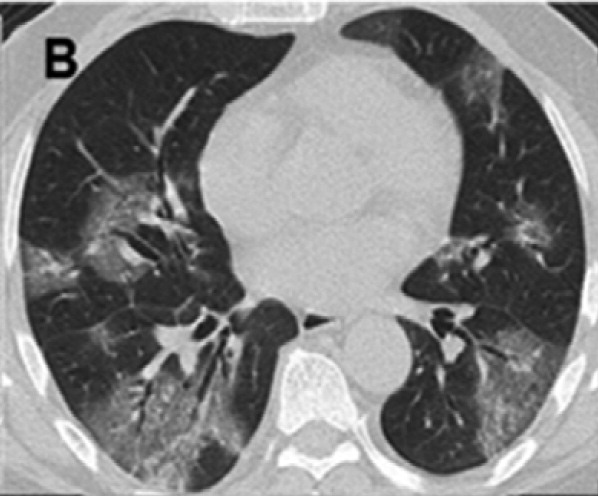

In [94]:
img3 = open_image('/content/testing/3-severe.jpg')
img3

In [95]:
pred_class,pred_idx,outputs = learn.predict(img3)
pred_class, outputs

(Category CT_NonCOVID, tensor([0.3625, 0.6375]))

In [96]:
files.upload()

Saving 6-pneumonia.jpg to 6-pneumonia.jpg


{'6-pneumonia.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xe1\x00LExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x02\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00&\x00\x00\x00\x00\x00\x02\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x03\xcb\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x02H\x00\x00\x00\x00\xff\xe1\t!http://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="XMP Core 5.4.0"> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about=""/> </rdf:RDF> </x:xmpmeta>                                                                                                                                                                                                                                                                                                                                                            

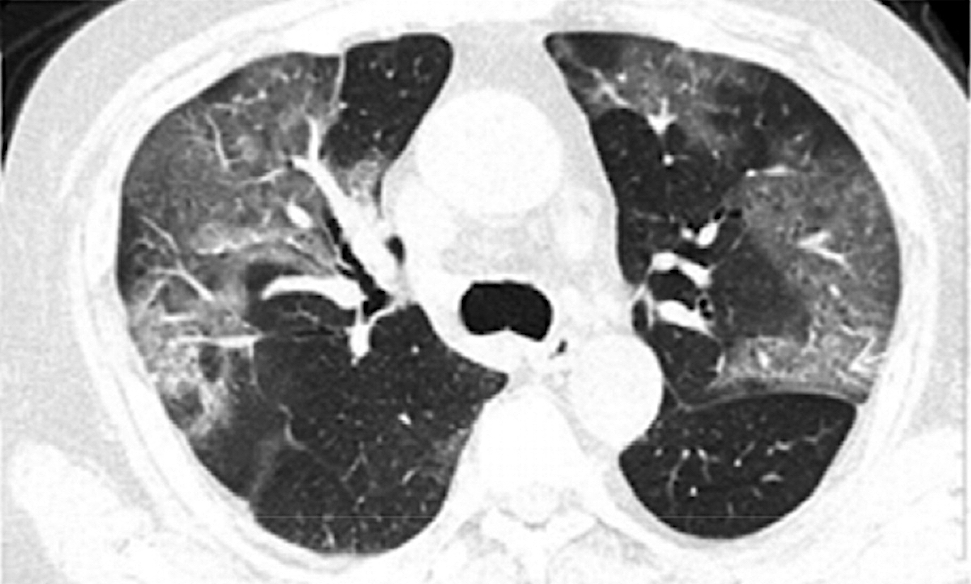

In [97]:
img6 = open_image('/content/testing/6-pneumonia.jpg')
img6

In [98]:
pred_class,pred_idx,outputs = learn.predict(img6)
pred_class, outputs

(Category CT_COVID, tensor([0.6012, 0.3988]))